In [3]:
# import libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

In [4]:
# Load Dataset
df = pd.read_csv("loans.csv")
df.head(10)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13
5,46109,home,6935,0,11501,2006-09-17,2008-11-26,1.94
6,46109,cash,6177,1,11141,2007-03-12,2009-04-26,9.48
7,46109,home,12656,0,11658,2006-05-26,2007-10-15,4.14
8,46109,home,11062,1,11611,2012-09-12,2014-03-14,5.48
9,46109,other,4050,1,10828,2003-12-06,2005-08-19,4.26


In [5]:
# بررسی اطلاعات داده ها از قبیل اطلاعات کلی - شکل - ستون های داده
print(df.info())
print("-"*80)
print(df.shape)
print("-"*80)
print(df.nunique())
print("-"*80)
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB
None
--------------------------------------------------------------------------------
(443, 8)
--------------------------------------------------------------------------------
client_id       25
loan_type        4
loan_amount    438
repaid           2
loan_id        443
loan_start     430
loan_end       428
rate           336
dtype: int64
------------------------------------------------------------------------

In [6]:
# نمایش نوع داده های فیلد های داده
print(df.dtypes)

client_id        int64
loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object


In [7]:
# چک کردن اطلاعات کلی دیتاست
df.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,443.0,38911.060948,7768.681063,25707.00,32885.00,39505.00,46109.00,49624.00
loan_amount,443.0,7982.311512,4172.891992,559.00,4232.50,8320.00,11739.00,14971.00
repaid,443.0,0.534989,0.499338,0.00,0.00,1.00,1.00,1.00
loan_id,443.0,11017.101580,581.826222,10009.00,10507.50,11033.00,11526.00,11991.00
rate,443.0,3.217156,2.397168,0.01,1.22,2.78,4.75,12.62


In [8]:
# چک کردن مقادیر گمشده در سطر و ستون
df.isnull().any()

client_id      False
loan_type      False
loan_amount    False
repaid         False
loan_id        False
loan_start     False
loan_end       False
rate           False
dtype: bool

In [9]:
# چک کردن مقادیر خالی درون دیتاست
df.isnull().sum()

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

In [10]:
# چک کردن مقدار های تکراری درون داده
df.duplicated().sum()

0

In [11]:
# درست کردن مقادیری که بصورت زمانی درون دیتاست درج شده اند
df['loan_end'] = pd.to_datetime(df['loan_end'])
df['loan_start'] = pd.to_datetime(df['loan_start'])
# بدست آوردن فاصله دو ستون و قرار دادن ان ها در یک ستون 
df['loan_duration'] = (df['loan_end'] - df['loan_start']).dt.days
# استخراج روز 
df['start_loan_day'] = df['loan_start'].dt.day
df['end_loan_day'] = df['loan_end'].dt.day
# استخراج ماه
df['start_month'] = df['loan_start'].dt.month
df['end_month'] = df['loan_end'].dt.month
# استخراج سال
df['start_loan_year'] = df['loan_start'].dt.year
df['end_loan_year'] = df['loan_end'].dt.year
#محاسبه مقدار مبلغی که مشتری باید نسبت به نرخ بهره پس بدهد
rate = df['rate'] * 0.01
df['rate_amount'] = (df['loan_amount'] * rate)
# حساب کردن مبلغی که باید توسط وام گیرنده بصورت ماهانه با نرخ بهره پرداخت بشود
df['monthly_payment'] = (df['loan_amount'] + df['rate_amount']) / df['loan_duration'] * 30
(df['loan_amount'] + df['rate_amount'])

0      13965.9480
1       9916.4250
2      12820.5912
3      12673.2232
4      14488.7337
          ...    
438    13281.8898
439     1819.0656
440     9856.0885
441     4385.8650
442     3647.7359
Length: 443, dtype: float64

In [12]:
# نسبت میزان سود به تعداد روز های که بازپرداختی وام فاصله افتاده است
df['rate_amount_loan_duration_ratio'] = df['rate_amount'] / df['loan_duration']

Skewness: -0.0401
Kurtosis: -1.2321
Mean: 7982.3115
Median: 8320.0000
Range: 14412


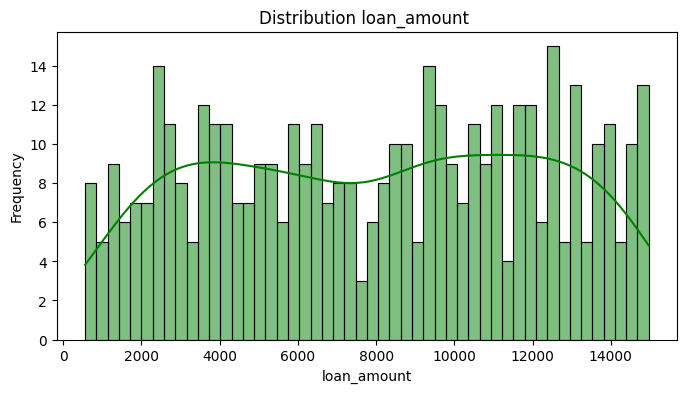

In [13]:
# بررسی معیار های آماری ستون مقدار وام
skew = df['loan_amount'].skew()
kurt = df['loan_amount'].kurt()
mean = df['loan_amount'].mean()
median = df['loan_amount'].median()
range = np.ptp(df['loan_amount'])
# نمایش نتیجه
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")
# نمایش توزیع ستون مقدار وام
plt.figure(figsize=(8, 4))
sns.histplot(df['loan_amount'], color='green',kde=True, bins=50)
plt.title("Distribution loan_amount ", fontsize=12)
plt.ylabel("Frequency", fontsize=10)
plt.xlabel("loan_amount", fontsize=10)
plt.show()

Kurtosis: 1.3020
Mean: 0.3445
Skewness: 1.3156
Range: 1.5346909624343343
Median: 0.2507


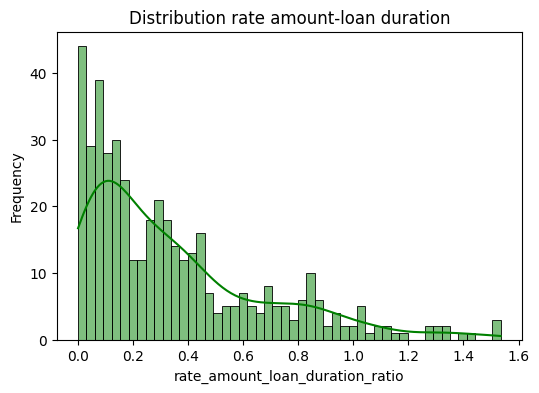

In [14]:
# rate_amount_loan_duration_ratio بررسی
# بررسی چولگی و کورتوسیس ستون repaid_loan_duration_ratio
mean = df['rate_amount_loan_duration_ratio'].mean()
skew = df['rate_amount_loan_duration_ratio'].skew()
kurt = df['rate_amount_loan_duration_ratio'].kurt()
median = df['rate_amount_loan_duration_ratio'].median()
range = np.ptp(df['rate_amount_loan_duration_ratio'])
# بررسی نتیجه
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Skewness: {skew:.4f}")
print(f"Range: {range}")
print(f"Median: {median:.4f}")
plt.figure(figsize=(6, 4))
sns.histplot(df['rate_amount_loan_duration_ratio'], bins=50, color='green',kde=True )
plt.title("Distribution rate amount-loan duration", fontsize=12)
plt.ylabel("Frequency", fontsize=10)
plt.xlabel("rate_amount_loan_duration_ratio", fontsize=10)
plt.show()

Kurtosis: 0.4244
Skewness: 0.8842
Median: 2.7800
Mean: 3.2172
Range: 12.61


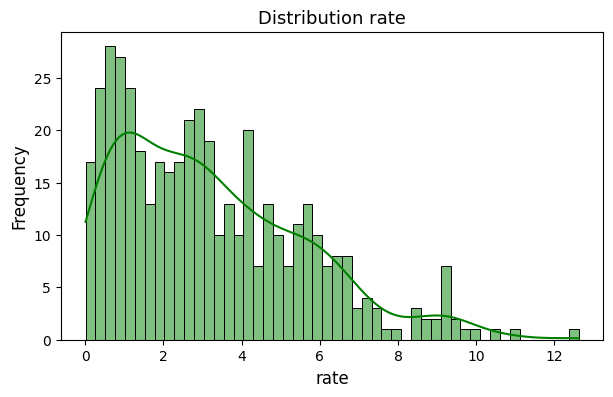

In [15]:
# بررسی توزیع ستون rate
mean = df['rate'].mean()
kurt = df['rate'].kurt()
median = df['rate'].median()
skew = df['rate'].skew()
range = np.ptp(df['rate'])
# بررسی نتیجه
print(f"Kurtosis: {kurt:.4f}")
print(f"Skewness: {skew:.4f}")
print(f"Median: {median:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Range: {range}")
#===================================
plt.figure(figsize=(7, 4))
sns.histplot(df['rate'], bins=50,color='green',kde=True)
plt.title("Distribution rate", fontsize=13)
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("rate", fontsize=12)
plt.show()

Skewness: -0.0189
Kurtosis: -1.1457
Mean: 751.9436
Median: 754.0000
Range: 498


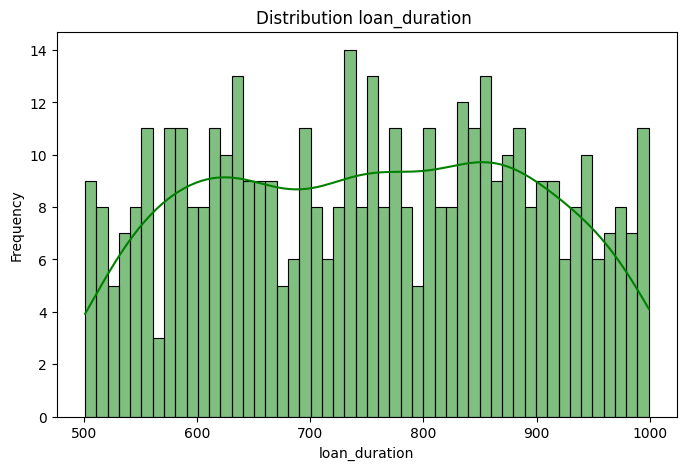

In [16]:
# loan_duration بررسی
kurt = df['loan_duration'].kurt()
skew = df['loan_duration'].skew()
median = df['loan_duration'].median()
range = np.ptp(df['loan_duration'])
mean = df['loan_duration'].mean()
# نمایش نتیجه
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")
plt.figure(figsize=(8, 5))
sns.histplot(df['loan_duration'], bins=50, kde=True,color='green')
plt.title("Distribution loan_duration ", fontsize=12)
plt.ylabel("Frequency", fontsize=10)
plt.xlabel("loan_duration", fontsize=10)
plt.show()

Kurtosis: 1.1757
Skewness: 1.2810
Mean: 253.4759
Range: 1153.8099000000002
Median: 166.5927


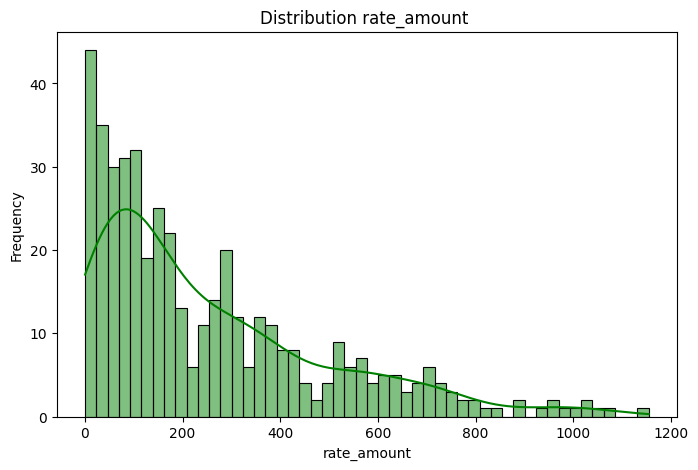

In [17]:
# rate_amount بررسی
kurt = df['rate_amount'].kurt()
skew = df['rate_amount'].skew()
median = df['rate_amount'].median()
mean = df['rate_amount'].mean()
range = np.ptp(df['rate_amount'])
# نمایش نتیجه
print(f"Kurtosis: {kurt:.4f}")
print(f"Skewness: {skew:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Range: {range}")
print(f"Median: {median:.4f}")
plt.figure(figsize=(8, 5))
sns.histplot(df['rate_amount'], bins=50,kde=True, color='green')
plt.title("Distribution rate_amount ", fontsize=12)
plt.ylabel("Frequency", fontsize=10)
plt.xlabel("rate_amount", fontsize=10)
plt.show()

Kurtosis: -0.5574
Skewness: 0.3529
Median: 329.0406
Mean: 340.0206
Range: 816.6754785499755


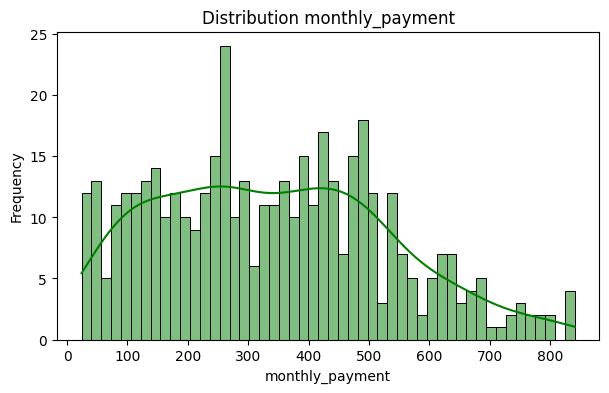

In [19]:
# monthly_payment بررسی
kurt = df['monthly_payment'].kurt()
median = df['monthly_payment'].median()
skew = df['monthly_payment'].skew()
mean = df['monthly_payment'].mean()
range = np.ptp(df['monthly_payment'])
# نمایش نتیجه
print(f"Kurtosis: {kurt:.4f}")
print(f"Skewness: {skew:.4f}")
print(f"Median: {median:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Range: {range}")
plt.figure(figsize=(7, 4))
sns.histplot(df['monthly_payment'], bins=50,kde=True,color='green')
plt.title("Distribution monthly_payment", fontsize=12)
plt.ylabel("Frequency", fontsize=10)
plt.xlabel("monthly_payment", fontsize=10)
plt.show()

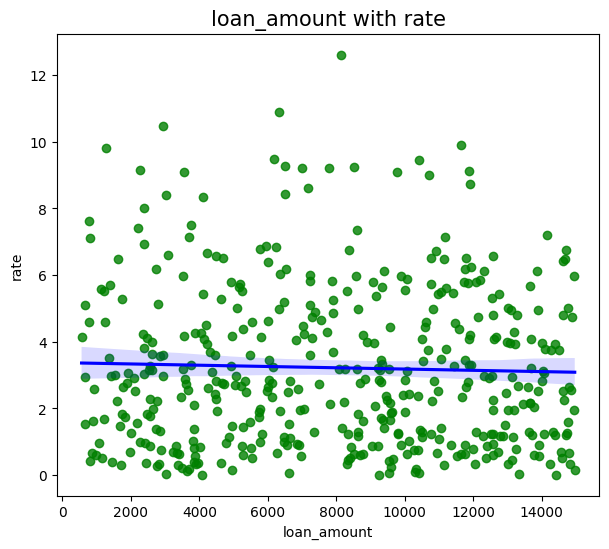

In [20]:
# مقایسه وام پرداخت شده با نرخ بهره
plt.figure(figsize=(7, 6))
sns.regplot(x='loan_amount', y="rate", data=df, line_kws={'color': 'blue'},color='green')
plt.title("loan_amount with rate", fontsize=15)
plt.ylabel("rate", fontsize=10)
plt.xlabel("loan_amount", fontsize=10)
plt.show()

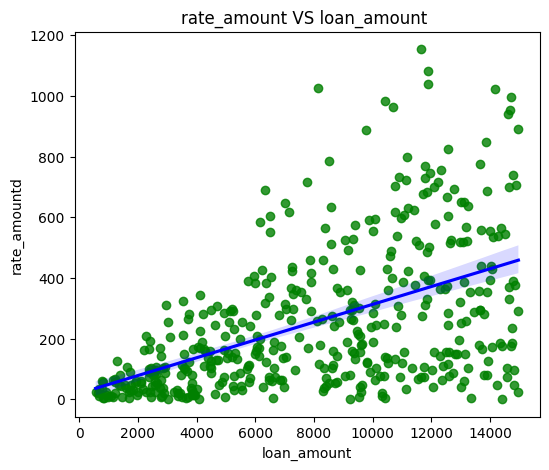

In [21]:
# مقدار وام در مقابل نرخ وام
plt.figure(figsize=(6, 5))
sns.regplot(data=df, x='loan_amount', y='rate_amount', color='green',line_kws={"color":"blue"})
plt.title("rate_amount VS loan_amount ", fontsize=12)
plt.ylabel("rate_amountd", fontsize=10)
plt.xlabel("loan_amount", fontsize=10)
plt.show()

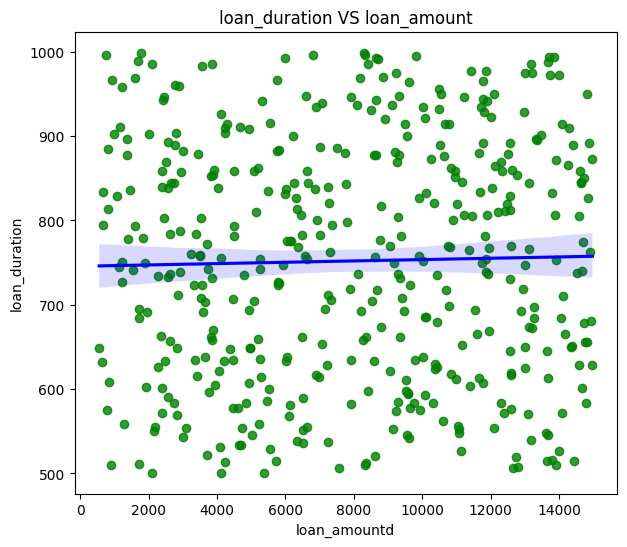

In [22]:
# رگرسیون مقدار وام در مقابل اختلاف وام
plt.figure(figsize=(7, 6))
sns.regplot(y="loan_duration",x='loan_amount', data=df, line_kws={"color":"blue"}, color='green')
plt.title("loan_duration VS loan_amount", fontsize=12)
plt.ylabel("loan_duration", fontsize=10)
plt.xlabel("loan_amountd", fontsize=10)
plt.show()

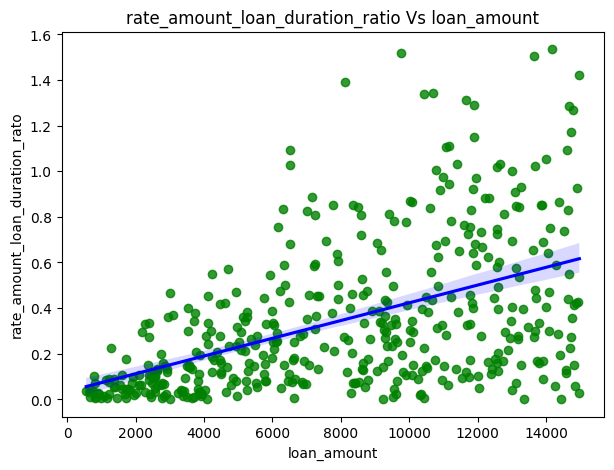

In [23]:
# نسبت مدت زمان وام میزان نرخ در مقابل مبلغ وام
plt.figure(figsize=(7, 5))
sns.regplot(data=df, x='loan_amount', y='rate_amount_loan_duration_ratio', line_kws={"color": "blue"}, color="green")
plt.title("rate_amount_loan_duration_ratio Vs loan_amount", fontsize=12)
plt.ylabel("rate_amount_loan_duration_rato", fontsize=10)
plt.xlabel("loan_amount", fontsize=10)
plt.show()

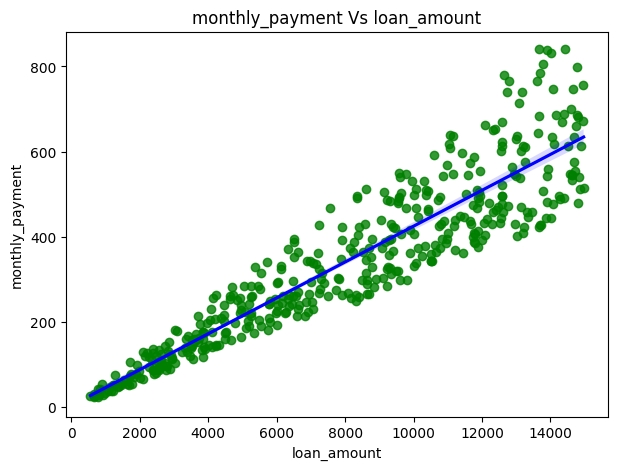

In [24]:
# رگرسیون مقدار وام در مقابل پرداخت ماهانه
plt.figure(figsize=(7, 5))
sns.regplot(data=df, x='loan_amount', y='monthly_payment',  color="green",line_kws={"color": "blue"})
plt.title("monthly_payment Vs loan_amount", fontsize=12)
plt.ylabel("monthly_payment", fontsize=10)
plt.xlabel("loan_amount", fontsize=10)
plt.show()

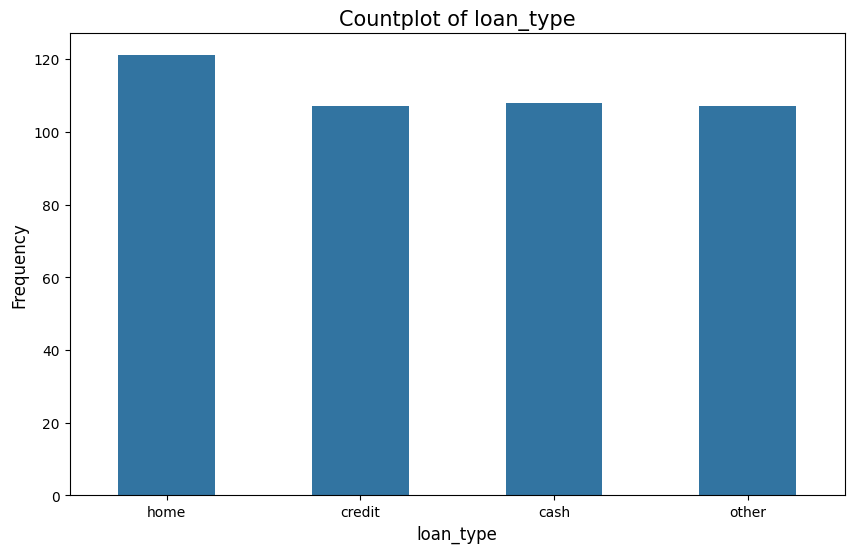

In [25]:
# نمایش نمودار میله ای فیلد نوع وام
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_type', width=0.5)
plt.title("Countplot of loan_type", fontsize=15)
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("loan_type", fontsize=12)
plt.show()


<Figure size 2500x1200 with 0 Axes>

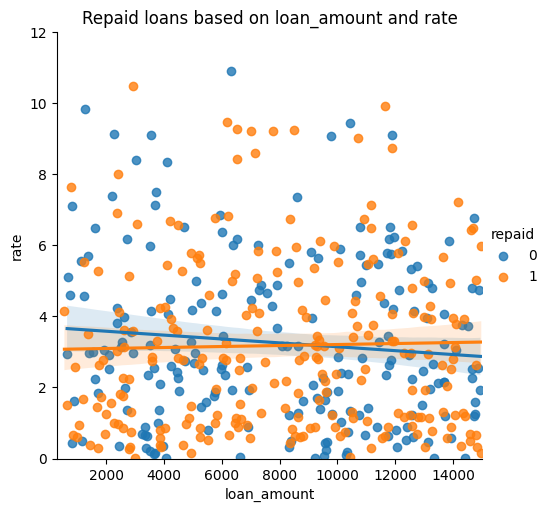

In [27]:
# نمایش وام های پرداخت شده بر حسب دو ستون
plt.figure(figsize=(25, 12))
graph = sns.lmplot(x='loan_amount',hue='repaid', y="rate", data=df)
graph.set(xlim=(300, 15000))
graph.set(ylim=(0, 12))
plt.title("Repaid loans based on loan_amount and rate", fontsize=12)
plt.ylabel("rate", fontsize=10)
plt.xlabel("loan_amount", fontsize=10)
plt.show()

## Countplot Of  `repaid`

**نمایش نمودار میله ایی ستون `repaid`**

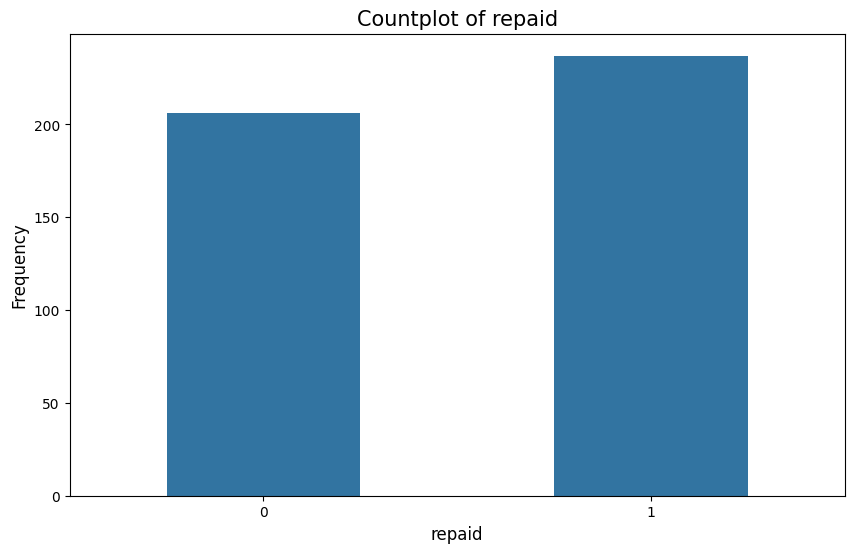

In [28]:
# چک کردن مقادیر درون فیلد نوع وام
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='repaid', width=-0.5)
plt.title("Countplot of repaid", fontsize=15)
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("repaid", fontsize=12)
plt.show()

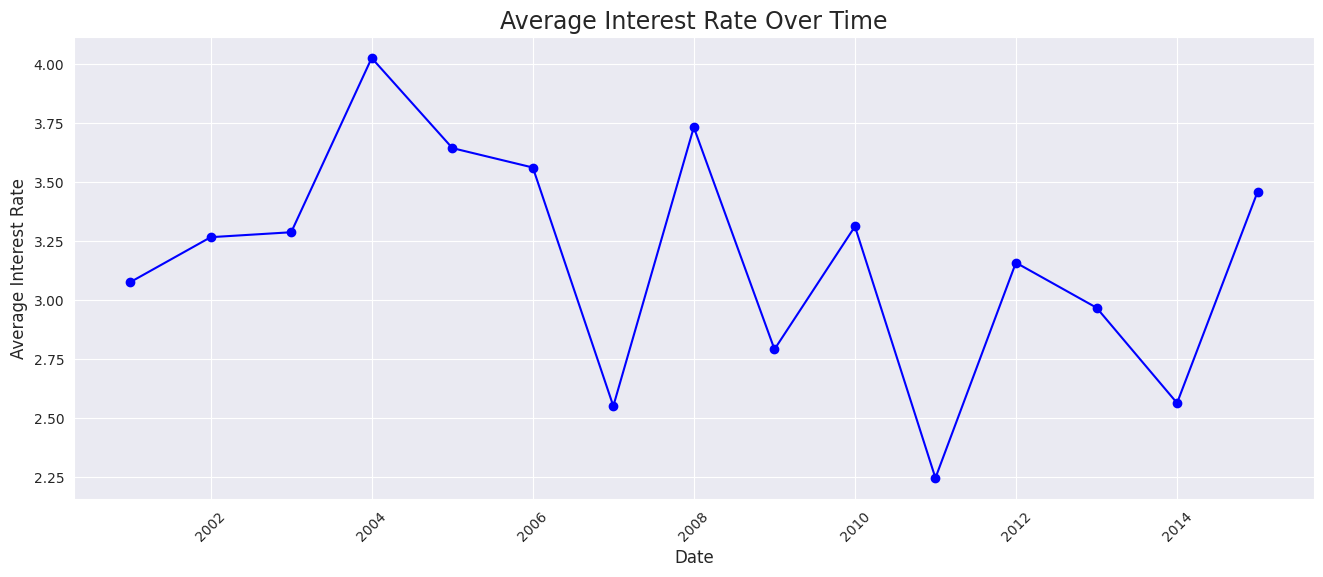

In [29]:
# محاسبه میانگین نرخ بهره بصورت تایم فریم سالانه
interest_rates = df.groupby(pd.Grouper(key='loan_start', freq='Y'))['rate'].mean()
plt.figure(figsize=(16, 6))
sns.set_style('darkgrid')
plt.plot(interest_rates.index, interest_rates.values, linestyle='-', marker='o', color='blue')
plt.title('Average Interest Rate Over Time', fontsize=17)
plt.ylabel('Average Interest Rate', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.show()

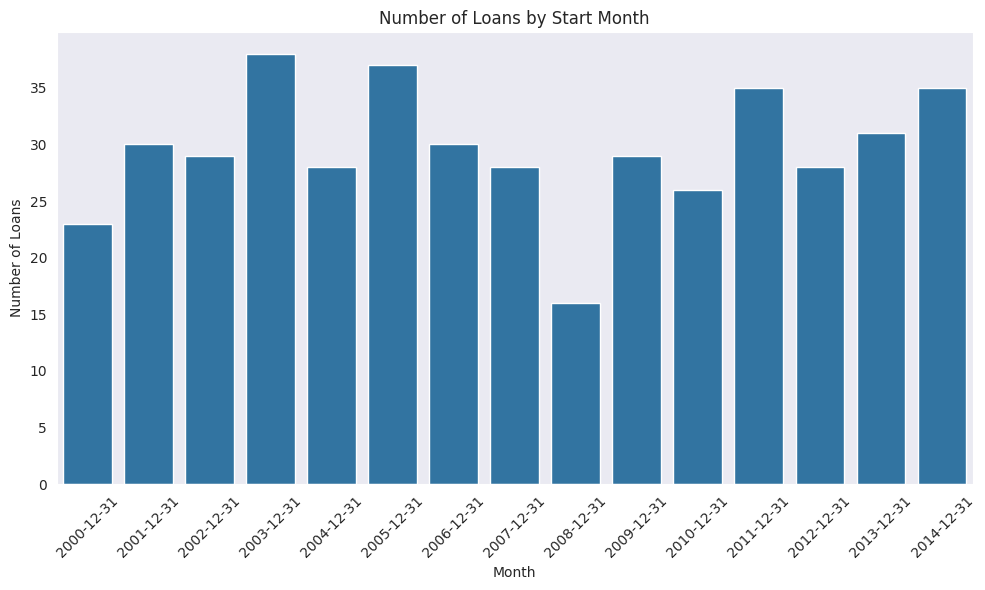

In [30]:
# بررسی تعداد وام‌ها بر اساس سال شروع وام
loan_counts_per_month = df.groupby(pd.Grouper(key='loan_start', freq='Y'))['loan_start'].count()
# رسم نمودار با استفاده از seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=loan_counts_per_month.index, y=loan_counts_per_month.values)
plt.title('Number of Loans by Start Month', fontsize=12)
plt.ylabel('Number of Loans', fontsize=10)
plt.xlabel('Month', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

___________

In [31]:
# نمایش معیار های آماری نرخ بهره بر اساس ستون های وام پرداخت شده و نوع وام
df.groupby(['loan_type', 'repaid'])[['rate']].agg(['mean', 'median', 'count'])

rate             
                      mean median count
loan_type repaid                       
cash      0       2.938200  2.530    50
          1       3.154138  2.765    58
credit    0       3.011304  2.430    46
          1       3.630656  3.430    61
home      0       3.507385  3.140    65
          1       3.101964  2.395    56
other     0       3.508444  2.850    45
          1       2.835323  2.380    62

In [32]:
# نمایش تعداد وام و مجموع مقدار وام هر مشتری
df.groupby('client_id')[['loan_amount']].agg(['size', 'sum', 'mean'])

loan_amount                      
                 size     sum          mean
client_id                                  
25707              20  159279   7963.950000
26326              16  116321   7270.062500
26695              18  140845   7824.722222
26945              15  106889   7125.933333
29841              18  176634   9813.000000
32726              19  126032   6633.263158
32885              15  148806   9920.400000
32961              17  133998   7882.235294
35089              20  138784   6939.200000
35214              18  129124   7173.555556
38537              17  152768   8986.352941
39384              19  149444   7865.473684
39505              20  148481   7424.050000
41472              16  120173   7510.812500
41480              20  157897   7894.850000
42320              15  105931   7062.066667
44387              15  110816   7387.733333
44601              20  137385   6869.250000
46109              20  179032   8951.600000
46180              20  154017   7700.850000
46958              13  121919   9378.384615
48177              19  141063   7424.368421
49068              18  137122   7617.888889
49545              20  205786  10289.300000
49624              15  137618   9174.533333

In [33]:
#  میانگین مبلغ وام بر اساس نوع وام و وضعیت باز پرداخت
df.pivot_table(index='loan_type', columns='repaid', values='loan_amount', aggfunc='mean')

repaid,0,1
loan_type,,
cash,7235.400000,8841.620690
credit,7859.086957,7104.819672
home,7937.353846,8092.910714
other,8747.155556,8127.661290


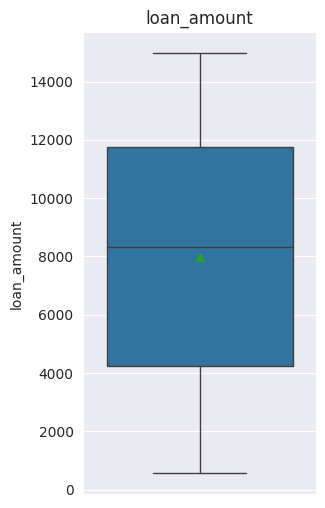

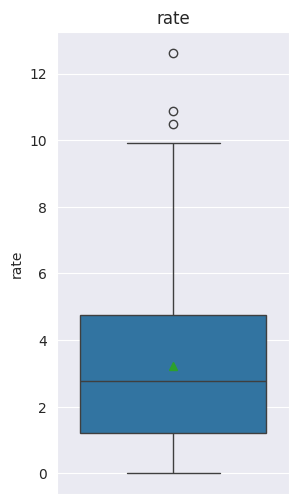

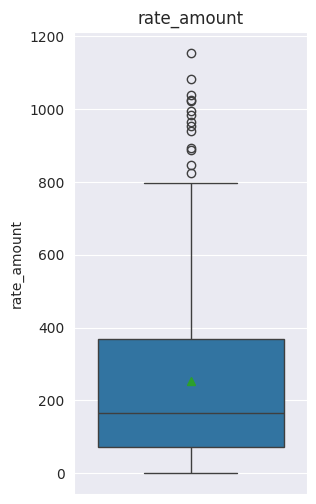

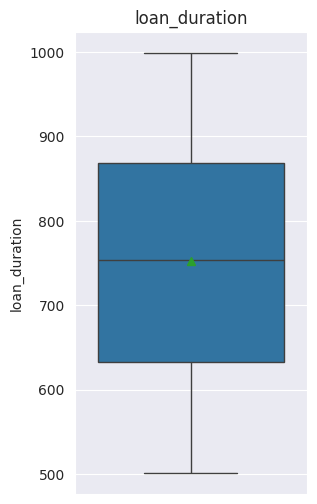

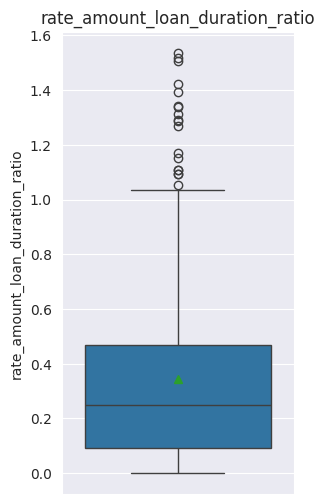

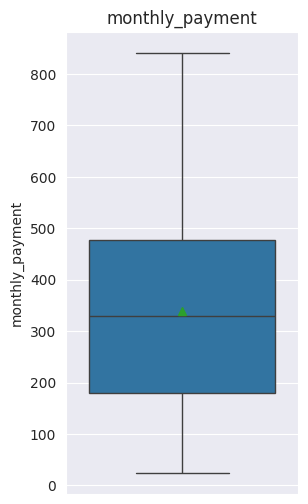

In [34]:
# Preprocessing
# Decet Outliers
numeric_col = ['loan_amount','rate','rate_amount','loan_duration','rate_amount_loan_duration_ratio', 'monthly_payment']
for col in numeric_col:
    plt.figure(figsize=(3, 6))
    sns.boxplot(df[col], showmeans=True)
    plt.title(f"{col}")
    plt.show()

In [35]:
# Remove Outliers Dataframe
def remove_outliers(df, column_name):
    Q1 = np.quantile(df[column_name], 0.25)
    Q3 = np.quantile(df[column_name], 0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df

In [36]:
# حذف داده های پرت
numeric_col = ['rate', 'loan_amount', 'loan_duration', 'rate_amount', 'monthly_payment', 'rate_amount_loan_duration_ratio']
for col in numeric_col:
    df = remove_outliers(df, col)
# ریست دیتافریم
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   client_id                        415 non-null    int64         
 1   loan_type                        415 non-null    object        
 2   loan_amount                      415 non-null    int64         
 3   repaid                           415 non-null    int64         
 4   loan_id                          415 non-null    int64         
 5   loan_start                       415 non-null    datetime64[ns]
 6   loan_end                         415 non-null    datetime64[ns]
 7   rate                             415 non-null    float64       
 8   loan_duration                    415 non-null    int64         
 9   start_loan_day                   415 non-null    int32         
 10  end_loan_day                     415 non-null    int32        

In [37]:
# چک کردن مقدار درون ستون نوع وام
df['loan_type'].value_counts()

loan_type
home      107
cash      104
other     103
credit    101
Name: count, dtype: int64

In [38]:
# کد گذاری داده ها با تابع گت دامیس
df = pd.get_dummies(df, columns=['loan_type'], dtype='int')
# نمایش دیتافریم بعد از اعمال تغییرات
df.sample(5)

,client_id,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration,start_loan_day,end_loan_day,...,end_month,start_loan_year,end_loan_year,rate_amount,monthly_payment,rate_amount_loan_duration_ratio,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
295,44387,8770,1,11588,2005-05-29,2007-07-15,4.19,777,29,15,...,7,2005,2007,367.4630,352.797799,0.472925,0,0,1,0
356,38537,9457,1,10276,2004-07-09,2006-06-01,2.37,692,9,1,...,6,2004,2006,224.1309,419.702207,0.323889,0,0,0,1
19,49545,3851,1,11033,2011-04-27,2014-01-07,0.81,986,27,7,...,1,2011,2014,31.1931,118.119466,0.031636,1,0,0,0
351,38537,5776,1,10392,2012-10-27,2014-10-21,1.00,724,27,21,...,10,2012,2014,57.7600,241.730387,0.079779,0,0,0,1
247,44601,10120,0,10177,2001-11-03,2004-02-13,2.42,832,3,13,...,2,2001,2004,244.9040,373.734519,0.294356,0,1,0,0


In [39]:
# Standardization
scaler = StandardScaler()
for col in df.columns:
    df[col] = scaler.fit_transform(df[[col]])
df.head()

,client_id,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration,start_loan_day,end_loan_day,...,end_month,start_loan_year,end_loan_year,rate_amount,monthly_payment,rate_amount_loan_duration_ratio,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
0,0.924895,1.436292,-1.057046,-1.319187,-1.224713,-1.309678,-0.369623,-1.021231,0.063662,0.514589,...,1.636003,-1.174051,-1.415589,0.399294,1.949268,0.753849,-0.578278,-0.567147,1.696616,-0.574568
1,0.924895,0.496729,-1.057046,-0.047587,-0.877319,-0.949728,-0.789700,-0.863654,0.640516,0.180562,...,0.161326,-0.944766,-0.959125,-0.491285,0.777514,-0.387676,-0.578278,1.763210,-0.589409,-0.574568
2,0.924895,1.209033,0.946032,-0.037290,-0.353400,-0.500260,-1.055749,-1.694515,-1.666898,-1.155544,...,0.161326,-0.256910,-0.502661,-0.677341,2.263120,-0.490999,-0.578278,-0.567147,1.696616,-0.574568
3,0.924895,1.156700,0.946032,-0.713418,0.759143,0.833746,-0.794368,0.884020,-0.859303,-1.155544,...,-0.428545,0.660231,0.866732,-0.320991,0.581531,-0.452190,1.729273,-0.567147,-0.589409,-0.574568
4,0.924895,1.527631,0.946032,0.692035,0.662400,0.615272,0.087794,-0.512686,-0.974674,0.625931,...,-0.428545,0.660231,0.638500,1.156239,1.687566,1.404226,-0.578278,1.763210,-0.589409,-0.574568


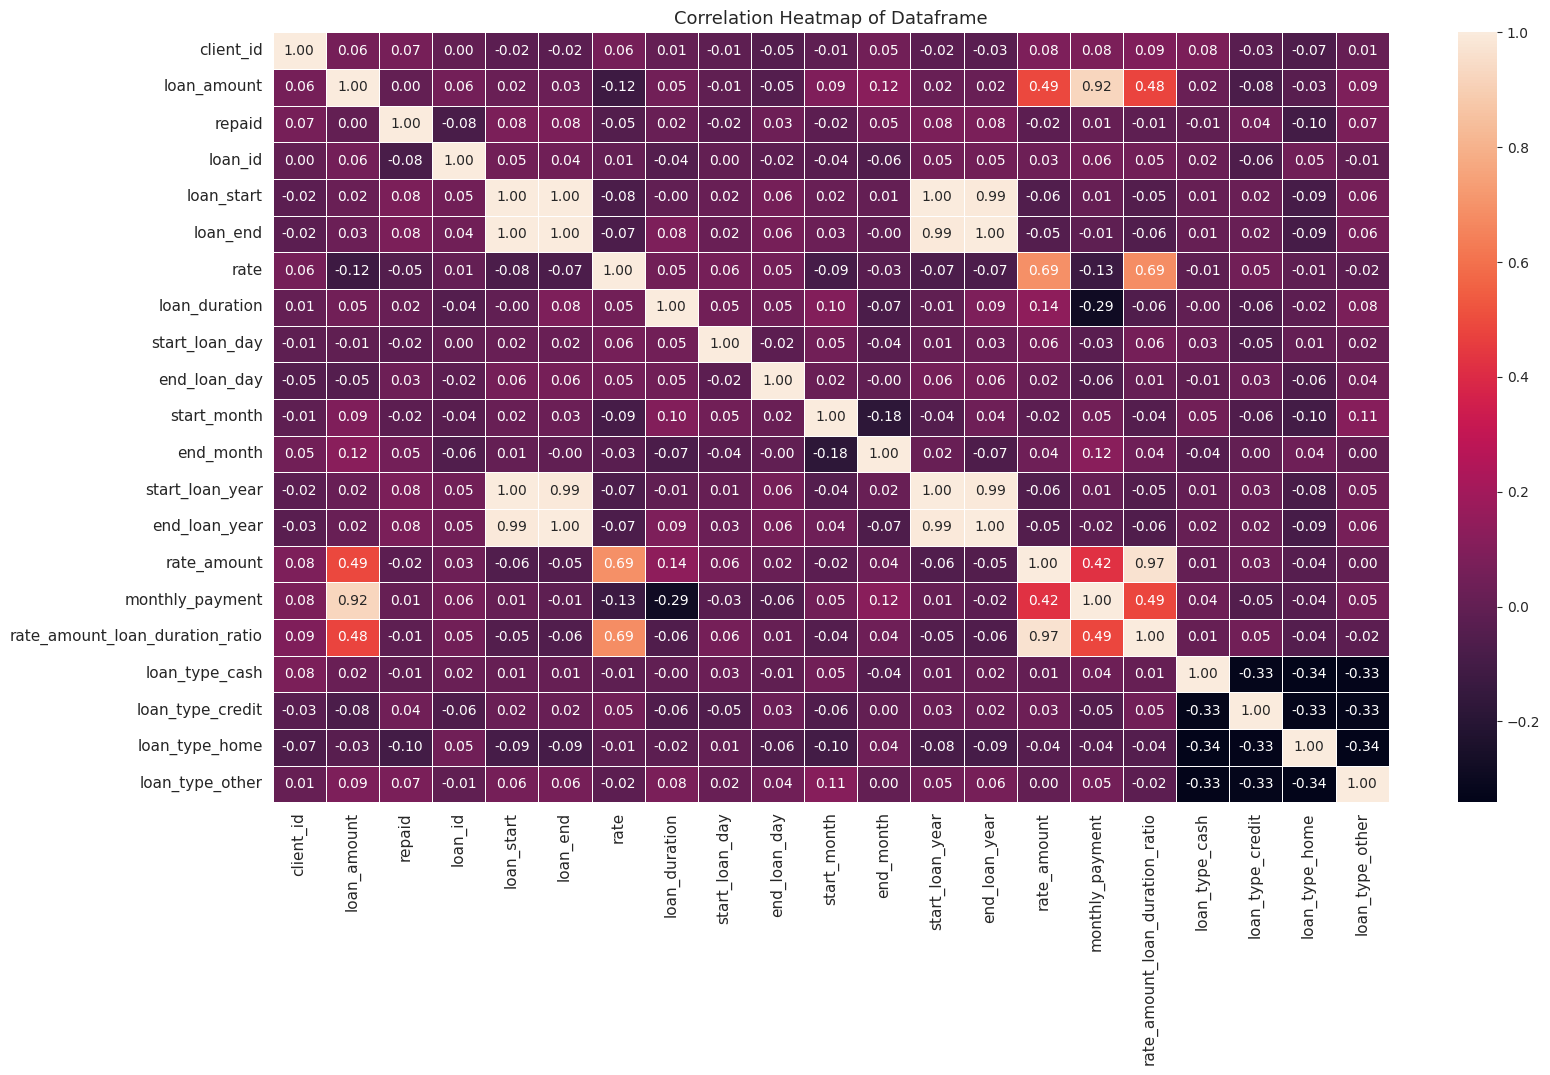

In [40]:
# نمایش میزان همبستگی داده ها درون فیلد ها
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(numeric_only=True), fmt='.2f',linewidths=0.5,annot=True)
plt.title("Correlation Heatmap of Dataframe", fontsize=13)
plt.yticks(rotation=0, fontsize=11)
plt.xticks(rotation=90, fontsize=11)
plt.show()

In [41]:
# بخش دوم تمرین
df_model = df[['loan_amount', 'repaid', 'rate', 'loan_duration', 'rate_amount', 'monthly_payment', 'rate_amount_loan_duration_ratio']]
df_model.head()

,loan_amount,repaid,rate,loan_duration,rate_amount,monthly_payment,rate_amount_loan_duration_ratio
0,1.436292,-1.057046,-0.369623,-1.021231,0.399294,1.949268,0.753849
1,0.496729,-1.057046,-0.789700,-0.863654,-0.491285,0.777514,-0.387676
2,1.209033,0.946032,-1.055749,-1.694515,-0.677341,2.263120,-0.490999
3,1.156700,0.946032,-0.794368,0.884020,-0.320991,0.581531,-0.452190
4,1.527631,0.946032,0.087794,-0.512686,1.156239,1.687566,1.404226


In [42]:
X = df_model[['monthly_payment']]
y = df_model['loan_amount']

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
score = model.score(X, y)
mse = mean_squared_error(y_pred, y_test)

print(f"SLR Score: {score}")
print(f"SLR MSE: {mse}")
print(f"SLR R-Squared: {r2}")

SLR Score: 0.8530626546415465
SLR MSE: 0.13981133026331066
SLR R-Squared: 0.8462646799236461


In [43]:
features = ['rate_amount','monthly_payment', 'rate_amount_loan_duration_ratio']
X = df_model[features]
y = df_model['loan_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr_model = LinearRegression()

mlr_model.fit(X_train, y_train)

y_pred = mlr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
score = mlr_model.score(X, y)
mse = mean_squared_error(y_pred, y_test)

print(f"R-Squared: {r2}")
print(f"MSE: {mse}")
print(f"Score: {score}")

R-Squared: 0.9450428612214281
MSE: 0.04997960570336971
Score: 0.9455793285601836


In [44]:
features = ['rate_amount','monthly_payment','rate_amount_loan_duration_ratio']

X = df[features]
y = df['loan_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
pf = PolynomialFeatures(degree=3)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
score = model.score(X_test_poly, y_test)
r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2}")
print(f"Score: {score}")
print(f"MSE: {mse}")

R-Squared: 0.9867336695850476
Score: 0.9867336695850476
MSE: 0.012064783174783284
